In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
original_image = plt.imread('faded4.jpg')

R_original_image = original_image[:,:,0]
G_original_image = original_image[:,:,1]
B_original_image = original_image[:,:,2]

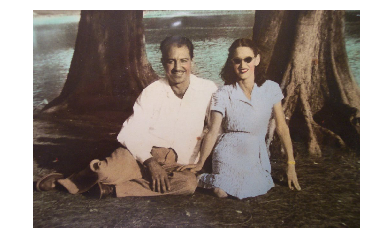

In [4]:
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.savefig('original.png', dpi = 300, bbox_inches='tight')
plt.show()

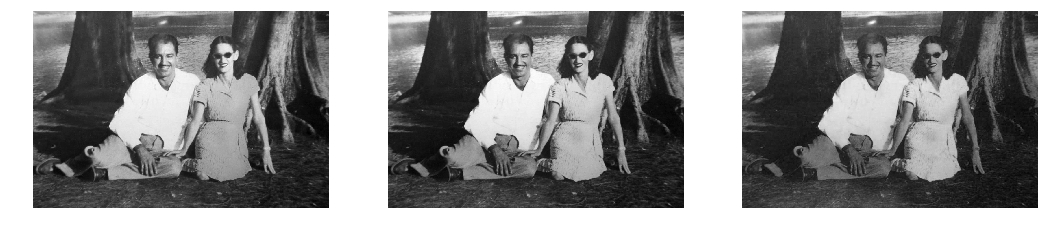

In [5]:
plt.figure(figsize=[18,12])

plt.subplot(131)
plt.imshow(R_original_image, cmap='gray')
#plt.title(str(np.sum(R_original_image)))
plt.axis('off')
plt.subplot(132)
plt.imshow(G_original_image, cmap='gray')
#plt.title(str(np.sum(G_original_image)))
plt.axis('off')
plt.subplot(133)
plt.imshow(B_original_image, cmap='gray')
#plt.title(str(np.sum(B_original_image)))
plt.axis('off')
plt.show()

### Contrast Stretching

In [6]:
def contrast_stretching(X):
    return ((X - X.min()) / (X.max() - X.min())) * 255

In [7]:
R_stretched = contrast_stretching(R_original_image)
G_stretched = contrast_stretching(G_original_image)
B_stretched = contrast_stretching(B_original_image)

In [8]:
stretched_image = np.copy(original_image)
stretched_image[:,:,0] = R_stretched
stretched_image[:,:,1] = G_stretched
stretched_image[:,:,2] = B_stretched

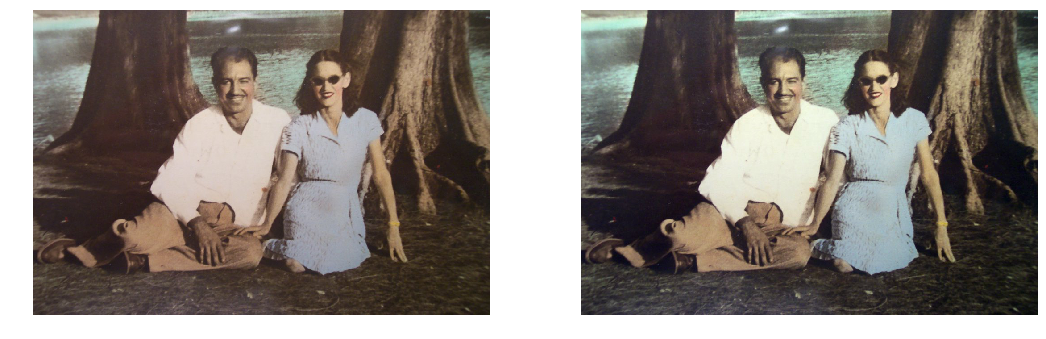

In [9]:
plt.figure(figsize=[18,12])

plt.subplot(121)
plt.imshow(original_image)
plt.axis('off')
plt.subplot(122)
plt.imshow(stretched_image)
plt.axis('off')
plt.savefig('originalvstretched.png', dpi = 300, bbox_inches='tight')
plt.show()

### Gray World Algorithm

In [10]:
#min-max normalization
def normalization_min_max(X):
    return (X - X.min()) / (X.max() - X.min())

#The same as contrast stretching

In [11]:
R_ave = np.mean(R_original_image)
G_ave = np.mean(G_original_image)
B_ave = np.mean(B_original_image)

R_grayworld = R_original_image / R_ave
G_grayworld = G_original_image / G_ave
B_grayworld = B_original_image / B_ave

#Rescaling each channel
R_grayworld1 = (R_grayworld/R_grayworld.max()) * 255
G_grayworld1 = (G_grayworld/G_grayworld.max()) * 255
B_grayworld1 = (B_grayworld/B_grayworld.max()) * 255

#Normalizing each channel
R_grayworld2 = normalization_min_max(R_grayworld) * 255
G_grayworld2 = normalization_min_max(G_grayworld) * 255
B_grayworld2 = normalization_min_max(B_grayworld) * 255

In [12]:
grayworld_image = np.copy(original_image)
grayworld_image[:,:,0] = R_grayworld
grayworld_image[:,:,1] = G_grayworld
grayworld_image[:,:,2] = B_grayworld

grayworld_image1 = np.copy(original_image)
grayworld_image1[:,:,0] = R_grayworld1
grayworld_image1[:,:,1] = G_grayworld1
grayworld_image1[:,:,2] = B_grayworld1

grayworld_image2 = np.copy(original_image)
grayworld_image2[:,:,0] = R_grayworld2
grayworld_image2[:,:,1] = G_grayworld2
grayworld_image2[:,:,2] = B_grayworld2

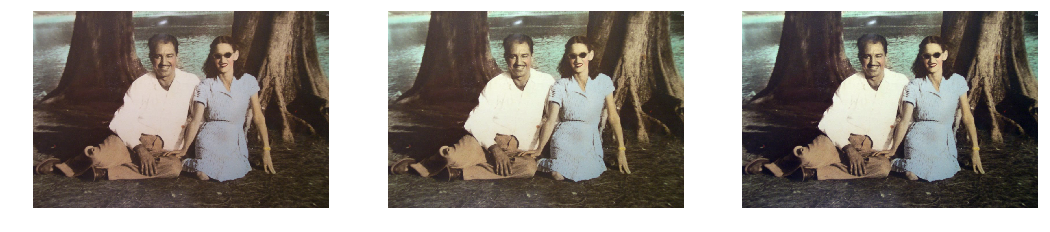

In [13]:
plt.figure(figsize=[18,12])

plt.subplot(131)
plt.imshow(original_image)
plt.axis('off')
plt.subplot(132)
plt.imshow(grayworld_image1)
plt.axis('off')
plt.subplot(133)
plt.imshow(grayworld_image2)
plt.axis('off')
plt.savefig('originalvsgray.png', dpi = 300, bbox_inches='tight')
plt.show()

### White Patch Algorithm

In [14]:
white_patch = original_image[350:400,300:350]

#R_patch_ave = white_patch[:,:,0].mean()
#G_patch_ave = white_patch[:,:,1].mean()
#B_patch_ave = white_patch[:,:,2].mean()

white_patch_ave = white_patch.mean()

In [15]:
R_white_patch = R_original_image / white_patch_ave
G_white_patch = G_original_image / white_patch_ave
B_white_patch = B_original_image / white_patch_ave

#Rescaling each channel
R_white_patch1 = (R_white_patch/R_white_patch.max()) * 255
R_white_patch1 = (G_white_patch/G_white_patch.max()) * 255
R_white_patch1 = (B_white_patch/B_white_patch.max()) * 255

#Normalizing each channel
R_white_patch2 = normalization_min_max(R_white_patch) * 255
R_white_patch2 = normalization_min_max(G_white_patch) * 255
R_white_patch2 = normalization_min_max(B_white_patch) * 255

In [16]:
whitepatch_image = np.copy(original_image)
whitepatch_image[:,:,0] = R_grayworld
whitepatch_image[:,:,1] = G_grayworld
whitepatch_image[:,:,2] = B_grayworld

whitepatch_image1 = np.copy(original_image)
whitepatch_image1[:,:,0] = R_grayworld1
whitepatch_image1[:,:,1] = G_grayworld1
whitepatch_image1[:,:,2] = B_grayworld1

whitepatch_image2 = np.copy(original_image)
whitepatch_image2[:,:,0] = R_grayworld2
whitepatch_image2[:,:,1] = G_grayworld2
whitepatch_image2[:,:,2] = B_grayworld2

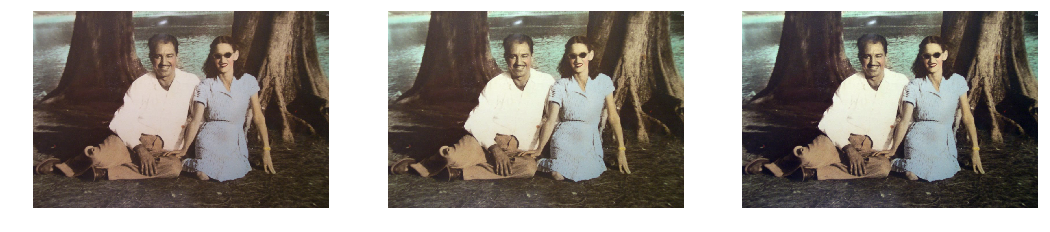

In [17]:
plt.figure(figsize=[18,12])

plt.subplot(131)
plt.imshow(original_image)
plt.axis('off')
plt.subplot(132)
plt.imshow(whitepatch_image1)
plt.axis('off')
plt.subplot(133)
plt.imshow(whitepatch_image2)
plt.axis('off')
plt.savefig('originalvswhite.png', dpi=300, bbox_inches='tight')
plt.show()

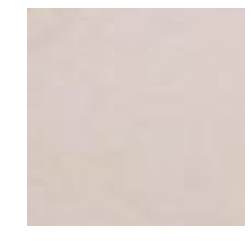

In [18]:
plt.imshow(white_patch)
plt.axis('off')
plt.savefig('whitepatch.png', dpi=300, bbox_inches='tight')